## Final Project: Medium Age influence on Social Spending in Japan and The United States


#### Principal Investigator: Daniel Rodriguez-Katakura
#### Email: [drk341@stern.nyu.edu]

#### Abstract:
In this project, I will analyze the Social Spending of OECD countries from 1980 to 2015. In particular, I will focus on Japan, who currently has a very high medium age, and the US, whose population medium age is expected to grow. This project will be broken down into three sections. The first section will analyze overall Social Spending trends including the Net Social Spending of Japan and United States, the CAGR of Social Spending by OECD countries, Average Social Spending by OECD countries. The second section will break down the Social Spending of Japan and the United States by sector, and I will specifically focus on Old Age Social Spending trends. The final section will focus on the Medium Age trends in Japan and the United States and how they are correlated to Old Age Social Spending in both countries. 

#### Introduction:
This project is prompted by the idea that social spending in the US is expected to increase as people are living longer and medium age is increasing. Furthermore, social spending will be a key driver in increasing the Fiscal Deficit within the US, which brings the question whether the deficit is sustainable. AS defined by the OECD, Social Expenditures or Social Spending comprise of cash benefits, direct in-kind provision of goods and services, and tax breaks with social purposes. These Social Expenditures comprise of benefits targeted toward low-income households, the elderly, sick, unemployed and young people. In the US, Government spending is projected to grow at an annual rate of 5.5 percent over the next decade, reaching $7.0 trillion in 2028. From this increase, spending from Social Security, Medicare, and Net interest account for more than two-thirds of that increase ([CBO](https://www.cbo.gov/publication/53766)). The aging of the population is a large factor in the increase of overall Social Expenditure. The United States stands to learn by analyzing Japan economic decisions to counteract an ageing population. 

#### Data Report

In this project, in order to analyze Social Spending and Medium Age trends,  I will need to use public data on social spending provided by the [OECD](https://data.oecd.org/). Specifically, I will use both a [general social spending database](https://data.oecd.org/socialexp/social-spending.htm) and an [aggregated social expenditure database](https://stats.oecd.org/BrandedView.aspx?oecd_bv_id=socx-data-en&doi=data-00166-en) provided by the [Organisation for Economic Co-operation and Development(OECD)](https://data.oecd.org/). From the general social spending database, I will extract general social spending trends from a few OECD countries. From the aggreagated social expenditure database, I will extract specific aspects of Japan's and the United States's social expenditures by breaking it down into large components. To analyze Medium Age trends, I will use the [United Nations Population Prospects](https://population.un.org/wpp/Download/Standard/Population/) to get a database showing the population trends of Japan and the United States. All these databases will be read into this notebook and cleaned, mergedm and extracted for my use.

#### Three Sections:
<a id='section8'></a>
##### [1.](#section12) Overall Social Spending Analysis
 - [Net Total Social Spending as a Percentage of GDP by Year](#section1)
 - [Average Social Spending from 1980-2015 and CAGR in Social Spending from 1980-2015](#section2)
 
##### [2.](#section11) Japan and United States Break down of Social Spending and focus on Old Age Social Spending
 - [Breakdown of Japan and USA's Social Spending 1980-2015](#section3)
 - [Old Age Social Spending as a % of GDP](#section4)
 - [CAGR of Old Age Social Spending](#section5)
 
##### [3.](#section10) Japan and United States Medium Age Trends and Medium Age and Old Age Correlative Analysis
 - [Medium Age Trend 1980-2015](#section6)
 - [Linear Regression of Medium Age and Old Age Social Spending](#section7)

#### [Conclusion:](#section9)

<a id='section12'></a>
## Section 1: Overall Social Spending Analysis

In [1]:
import pandas as pd # We know this one...
import numpy as np # For performing numerical analysis
import matplotlib.pyplot as plt # Plotting
import os
import weightedcalcs as wc # This allows for "weighted" calculations

Here I am importing the Social Spending Indicator from the OECD Social Spending Database

In [2]:
url1 = "https://stats.oecd.org/sdmx-json/data/DP_LIVE/.SOCEXP.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en"

In [3]:
social = pd.read_csv(url1)

In [4]:
social.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SOCEXP,PRIV,PC_GDP,A,1980,1.223,NaN
1,AUS,SOCEXP,PRIV,PC_GDP,A,1981,1.392,NaN
2,AUS,SOCEXP,PRIV,PC_GDP,A,1982,1.678,NaN
3,AUS,SOCEXP,PRIV,PC_GDP,A,1983,1.345,NaN
4,AUS,SOCEXP,PRIV,PC_GDP,A,1984,0.862,NaN


In [5]:
social.shape

(4106, 8)

In [6]:
def netsocialspending(df,country):
    df = df[df["LOCATION"]==country]
    df = df.set_index("TIME")
    df = df[df["MEASURE"] == "PC_GDP"]
    df1 = df[df["SUBJECT"]== "PRIV"]
    df2 = df[df["SUBJECT"] == "PUB"]
    df3 = df1.copy()
    df3["Value"] = df1["Value"] + df2["Value"]
    df3["SUBJECT"] = "Net_Total"
    
    return df3

Here I make a separate dataframe for Japan's Social Spending. Then I make one for Japan's Social Spending in USD per Capita separating the data frame from the Spending in USD per Capita Measure. Finally, I aggregate the Public and Private Social Spending to a yearly data frame from 1980 to 2015 of Total net social spending.

In [7]:
JPNSOC = social[social["LOCATION"]=="JPN"]
JPNSOC.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1658,JPN,SOCEXP,PRIV,PC_GDP,A,1980,0.075,NaN
1659,JPN,SOCEXP,PRIV,PC_GDP,A,1981,0.093,NaN
1660,JPN,SOCEXP,PRIV,PC_GDP,A,1982,0.085,NaN
1661,JPN,SOCEXP,PRIV,PC_GDP,A,1983,0.096,NaN
1662,JPN,SOCEXP,PRIV,PC_GDP,A,1984,0.105,NaN


In [8]:
JPNSOC_GDP = JPNSOC[JPNSOC["MEASURE"]== "PC_GDP"]
JPNSOC_GDP.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1658,JPN,SOCEXP,PRIV,PC_GDP,A,1980,0.075,NaN
1659,JPN,SOCEXP,PRIV,PC_GDP,A,1981,0.093,NaN
1660,JPN,SOCEXP,PRIV,PC_GDP,A,1982,0.085,NaN
1661,JPN,SOCEXP,PRIV,PC_GDP,A,1983,0.096,NaN
1662,JPN,SOCEXP,PRIV,PC_GDP,A,1984,0.105,NaN


In [9]:
JPNSOC_GDP.set_index("TIME", inplace = True)

In [10]:
JPNSOC_GDP.tail(10)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
2009,JPN,SOCEXP,PUBNET,PC_GDP,A,20.159,NaN
2011,JPN,SOCEXP,PUBNET,PC_GDP,A,21.481,NaN
2013,JPN,SOCEXP,PUBNET,PC_GDP,A,21.253,NaN
2015,JPN,SOCEXP,PUBNET,PC_GDP,A,20.770,NaN
2005,JPN,SOCEXP,TOTNET,PC_GDP,A,19.204,NaN
2007,JPN,SOCEXP,TOTNET,PC_GDP,A,20.188,NaN
2009,JPN,SOCEXP,TOTNET,PC_GDP,A,23.505,NaN
2011,JPN,SOCEXP,TOTNET,PC_GDP,A,24.768,NaN
2013,JPN,SOCEXP,TOTNET,PC_GDP,A,24.442,NaN


In [11]:
JPNPUB = JPNSOC_GDP[JPNSOC_GDP["SUBJECT"]=="PUB"]
JPNPUB.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
1980,JPN,SOCEXP,PUB,PC_GDP,A,9.991,NaN
1981,JPN,SOCEXP,PUB,PC_GDP,A,10.427,NaN
1982,JPN,SOCEXP,PUB,PC_GDP,A,10.769,NaN
1983,JPN,SOCEXP,PUB,PC_GDP,A,11.004,NaN
1984,JPN,SOCEXP,PUB,PC_GDP,A,10.871,NaN


In [12]:
JPNPRIV = JPNSOC_GDP[JPNSOC_GDP["SUBJECT"]=="PRIV"]

In [13]:
JPNPRIV.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
1980,JPN,SOCEXP,PRIV,PC_GDP,A,0.075,NaN
1981,JPN,SOCEXP,PRIV,PC_GDP,A,0.093,NaN
1982,JPN,SOCEXP,PRIV,PC_GDP,A,0.085,NaN
1983,JPN,SOCEXP,PRIV,PC_GDP,A,0.096,NaN
1984,JPN,SOCEXP,PRIV,PC_GDP,A,0.105,NaN


In [14]:
JPNTOT = JPNPRIV.copy()

In [15]:
JPNTOT["Value"] = JPNPUB["Value"] + JPNPRIV["Value"]
JPNTOT["SUBJECT"] = "NET_TOTAL"

In [16]:
JPNTOT
#This is the cleaned up dataframe for Japan

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
1980,JPN,SOCEXP,NET_TOTAL,PC_GDP,A,10.066,NaN
1981,JPN,SOCEXP,NET_TOTAL,PC_GDP,A,10.520,NaN
1982,JPN,SOCEXP,NET_TOTAL,PC_GDP,A,10.854,NaN
1983,JPN,SOCEXP,NET_TOTAL,PC_GDP,A,11.100,NaN
1984,JPN,SOCEXP,NET_TOTAL,PC_GDP,A,10.976,NaN
1985,JPN,SOCEXP,NET_TOTAL,PC_GDP,A,10.956,NaN
1986,JPN,SOCEXP,NET_TOTAL,PC_GDP,A,11.302,NaN
1987,JPN,SOCEXP,NET_TOTAL,PC_GDP,A,11.357,NaN
1988,JPN,SOCEXP,NET_TOTAL,PC_GDP,A,11.056,NaN


In [17]:
def netsocialspending(df,country):
    df = df[df["LOCATION"]==country]
    df = df.set_index("TIME")
    df = df[df["MEASURE"] == "PC_GDP"]
    df1 = df[df["SUBJECT"]== "PRIV"]
    df2 = df[df["SUBJECT"] == "PUB"]
    df3 = df1.copy()
    df3["Value"] = df1["Value"] + df2["Value"]
    df3["SUBJECT"] = "Net_Total"
    
    return df3
#This function takes the dataframe and specific country and then returns the net total social spending done by that county


In [18]:
USATOT = netsocialspending(social,"USA")
USATOT

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
1980,USA,SOCEXP,Net_Total,PC_GDP,A,17.584,NaN
1981,USA,SOCEXP,Net_Total,PC_GDP,A,18.342,NaN
1982,USA,SOCEXP,Net_Total,PC_GDP,A,19.244,NaN
1983,USA,SOCEXP,Net_Total,PC_GDP,A,19.631,NaN
1984,USA,SOCEXP,Net_Total,PC_GDP,A,18.983,NaN
1985,USA,SOCEXP,Net_Total,PC_GDP,A,19.153,NaN
1986,USA,SOCEXP,Net_Total,PC_GDP,A,19.560,NaN
1987,USA,SOCEXP,Net_Total,PC_GDP,A,19.749,NaN
1988,USA,SOCEXP,Net_Total,PC_GDP,A,19.823,NaN


In [19]:
USATOT.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015],
           dtype='int64', name='TIME')

<a id='section1'></a>
### [Section 1: Net Total Social Spending as a Percentage of GDP by Year](#section8)

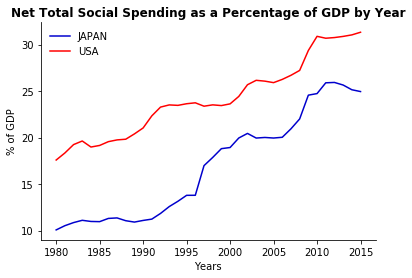

In [20]:
fig, ax = plt.subplots()
ax.plot(JPNTOT.index, JPNTOT["Value"], color = "mediumblue", label = "JAPAN")
ax.plot(USATOT.index, USATOT["Value"], color = "red", label = "USA")

ax.set_title("Net Total Social Spending as a Percentage of GDP by Year", fontsize = 12, fontweight = "bold")
ax.legend(frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel('Years')
plt.ylabel('% of GDP')
plt.show()
#plt.savefig("SocialSpendingperyear.png", bbox_inches = "tight", dpi = 1200)

This graph shows the increase in net total spending on Social Spending of both the United States and Japan from 1980-2015. We can see that around 1980 there was larger gap between the US and Japan in amount of Social Spending as % of GDP. This gap has become smaller in 2015. This smaller gap is due to the increased social spending in Japan that has rapidly caught up with the US.


Now I want to compare how Japan and US's Social Spending compares to other OECD Countries. I want to plot two graphs one that shows the Compounded Annual Growth Rate(CAGR) compared to the the rest of the world and another that shows the mean Social Spending from 1980 to 2015. 

To do this I will adjust the first function to give me the mean of several OECD countries Social Spending. Then I will adjust this equation to give me the CAGR of a select number of countries.

In [21]:
def meansocialspending(df,country):
    df = df[df["LOCATION"]==country]
    df = df.set_index("TIME")
    df = df[df["MEASURE"] == "PC_GDP"]
    df1 = df[df["SUBJECT"]== "PRIV"]
    df2 = df[df["SUBJECT"] == "PUB"]
    df3 = df1.copy()
    df3["Value"] = df1["Value"] + df2["Value"]    
    df3["SUBJECT"] = "Net_Total"
    
    return df3["Value"].mean()

This function will return the mean social spending from 1980 to 2015.

In [22]:
meansocialspending(social, "USA")

24.189861111111114

In [23]:
meansocialspending(social, "JPN")

16.924583333333334

In [24]:
meansocialspending(social, "DNK")

28.605972222222217

In [25]:
meansocialspending(social, "FRA")

27.9645

In [26]:
meansocialspending(social, "IRL")

19.66063888888889

In [27]:
meansocialspending(social, "DEU")

27.36961111111111

In [28]:
meansocialspending(social, "CAN")

20.910305555555553

In [29]:
meansocialspending(social, "AUS")

18.26262162162162

In [30]:
meansocialspending(social, "ESP")

20.69825

Now I want to adjust this function to give me the CAGR for each of these countries from 1980 to 2015

In [31]:
def CAGRsocialspending(df,country, startyr, endyr):
    df = df[df["LOCATION"]==country]
    df = df.set_index("TIME")
    df = df[df["MEASURE"] == "PC_GDP"]
    df1 = df[df["SUBJECT"]== "PRIV"]
    df2 = df[df["SUBJECT"] == "PUB"]
    df3 = df1.copy()
    df3["Value"] = df1["Value"] + df2["Value"]    
    df3["SUBJECT"] = "Net_Total"
    
    CAGR = ((df3.loc[endyr,"Value"]/df3.loc[startyr,"Value"])**(1/(endyr-startyr)) -1) * 100
    # here is my CAGR equation
    
    return CAGR


In [32]:
CAGRsocialspending(social,"USA", 1980, 2015)

1.6640322467138091

In [33]:
CAGRsocialspending(social,"JPN", 1980, 2015)

2.6273810782927454

In [34]:
CAGRsocialspending(social,"DNK", 1980, 2015)

0.8062150325409911

In [35]:
CAGRsocialspending(social,"FRA", 1980, 2015)

1.5457587745081103

In [36]:
CAGRsocialspending(social,"IRL", 1980, 2015)

0.14298078333527808

In [37]:
CAGRsocialspending(social,"DEU", 1980, 2015)

0.3368367392410532

In [38]:
CAGRsocialspending(social,"CAN", 1980, 2015)

1.1673487337151567

In [39]:
CAGRsocialspending(social,"AUS", 1980, 2015)

2.1729377186900045

In [40]:
CAGRsocialspending(social,"ESP", 1980, 2015)

1.5216337832978821

<a id='section2'></a>
### [Section 1: Social Spending CAGR and Mean Social Spending Among OECD Countries](#section8)

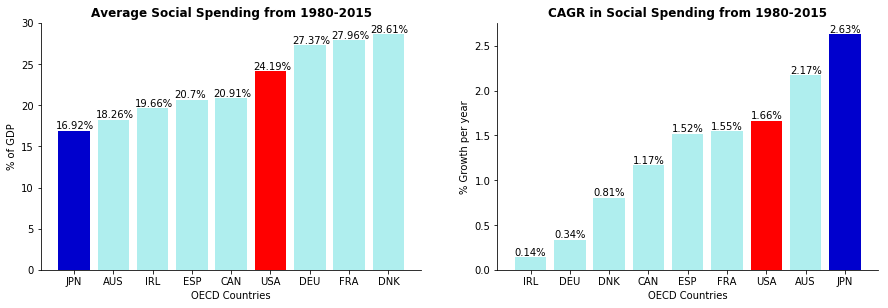

In [41]:
fig = plt.figure(figsize= (15,10))


countriesmean = [meansocialspending(social, "JPN"),meansocialspending(social, "AUS"),meansocialspending(social, "IRL"),meansocialspending(social, "ESP"),meansocialspending(social, "CAN"),meansocialspending(social, "USA"),meansocialspending(social, "DEU"),meansocialspending(social, "FRA"),meansocialspending(social, "DNK")]
numcountries = [1,2,3,4,5,6,7,8,9]
LABELS = ["JPN","AUS","IRL","ESP","CAN","USA","DEU","FRA","DNK"]

ax1 = plt.subplot(2,2,1)
plt.bar(numcountries,countriesmean,color = ["mediumblue","paleturquoise", "paleturquoise","paleturquoise","paleturquoise","r","paleturquoise","paleturquoise","paleturquoise"], align = "center" )
plt.xticks(numcountries, LABELS)

ax1.set_title("Average Social Spending from 1980-2015", fontsize = 12, fontweight = "bold")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

for i, v in enumerate(countriesmean):
    plt.text(numcountries[i] - 0.45, v + 0.19, str(round(v, 2))+"%")
plt.xlabel('OECD Countries')
plt.ylabel('% of GDP')


countries2015 = [CAGRsocialspending(social,"IRL", 1980, 2015),CAGRsocialspending(social,"DEU", 1980, 2015),CAGRsocialspending(social,"DNK", 1980, 2015),CAGRsocialspending(social,"CAN", 1980, 2015),CAGRsocialspending(social,"ESP", 1980, 2015),CAGRsocialspending(social,"FRA", 1980, 2015),CAGRsocialspending(social,"USA", 1980, 2015),CAGRsocialspending(social,"AUS", 1980, 2015),CAGRsocialspending(social,"JPN", 1980, 2015)]
LABELS2 = ["IRL","DEU","DNK","CAN","ESP","FRA","USA","AUS","JPN"]

ax2 = plt.subplot(2,2,2)
plt.bar(numcountries,countries2015,color = ["paleturquoise", "paleturquoise","paleturquoise","paleturquoise","paleturquoise","paleturquoise","r","paleturquoise","mediumblue"], align = "center" )
plt.xticks(numcountries, LABELS2)

ax2.set_title("CAGR in Social Spending from 1980-2015",fontsize = 12, fontweight = "bold")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
for i, v in enumerate(countries2015):
    plt.text(numcountries[i] - 0.40, v + 0.02, str(round(v, 2))+"%")
plt.xlabel('OECD Countries')
plt.ylabel('% Growth per year')
#plt.savefig("AVG_SOC.png", bbox_inches = "tight", dpi = 1200)
plt.show()

From the graph on the left, we can observe that Japan has had lower average social spending compared to other OECD countries. This is because of Japan's smaller focus on social spending before 2000. The US is around the average of OECD Countries in mean social spending between 1980 and 2015. 

If we look at the graph on the right, we observe immediately that Japan's social spending has the largest Compounded Annual Growth Rate. I want to now venture into why Japan's social spending CAGR is so high. The US is again around average for these OECD Countries.



<a id='section11'></a>
## Section 2: Japan and United States Break down of Social Spending and focus on Old Age Social Spending

Now I want to look at what specific factors are affecting the growth in Social Spending. I am now going to use the [Aggregated Social Expenditures Database](https://stats.oecd.org/BrandedView.aspx?oecd_bv_id=socx-data-en#) from the OECD. I am going to make a pie chart showing what makes up the social expenditures in the United States and Japan.

Here I will directly import the file from my computer.

In [42]:
url2 = r"C:\Users\DNRK1\Desktop\DATABOOTCAMP\SOCIAL_EXPENDITURE.csv"

In [43]:
soc_exp = pd.read_csv(url2)

C:\Users\DNRK1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [44]:
soc_exp["Source"].unique()
#we need to add Public and Private

array(['Public', 'Mandatory private', 'Voluntary private', 'Net Public',
       'Net Total', 'Private (Mandatory and Voluntary)'], dtype=object)

In [45]:
soc_exp["Measure"].unique()
# We need in percentage of GDP

array(['At current prices in national currency, in millions',
       'At constant prices (2010) in national currency, in millions',
       'Per head, at current prices and current PPPs, in US dollars',
       'In percentage of Gross Domestic Product',
       'In percentage of Gross National Income',
       'In percentage of Total General Government Expenditure',
       'Per head, at constant prices (2010) and constant PPPs (2010), in US dollars',
       'In percentage of Net National Income'], dtype=object)

In [46]:
soc_exp["Branch"].unique()

array(['Old age', 'Survivors', 'Incapacity related', 'Health', 'Family',
       'Active labour market programmes', 'Unemployment', 'Housing',
       'Other social policy areas', 'Total'], dtype=object)

Now I am going to clean the database to include only Japan, set index to years, set units to percentage of GDP, filter by total expenditure and total programme.

In [47]:
soc_exp.set_index("Year", inplace = True)

In [48]:
#soc_exp = soc_exp.fillna(0)

In [49]:
jpnsoc_exp = soc_exp[soc_exp["Country"]=="Japan"]

In [50]:
jpnsoc_exp_gdp = jpnsoc_exp[jpnsoc_exp["Measure"]=="In percentage of Gross Domestic Product"]
jpnsoc_exp_gdp

,SOURCE,Source,BRANCH,Branch,TYPEXP,Type of Expenditure,TYPROG,Type of Programme,UNIT,Measure,...,YEAR,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Year,,,,,,,,,,,,,,,,,,,,,
1980,10,Public,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1980,PC,Percentage,0,Units,NaN,NaN,2.859,NaN,NaN
1985,10,Public,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1985,PC,Percentage,0,Units,NaN,NaN,3.672,NaN,NaN
1990,10,Public,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1990,PC,Percentage,0,Units,NaN,NaN,3.946,NaN,NaN
1995,10,Public,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1995,PC,Percentage,0,Units,NaN,NaN,5.067,NaN,NaN
2000,10,Public,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2000,PC,Percentage,0,Units,NaN,NaN,6.541,NaN,NaN
2005,10,Public,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2005,PC,Percentage,0,Units,NaN,NaN,8.015,NaN,NaN
2010,10,Public,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2010,PC,Percentage,0,Units,NaN,NaN,9.779,NaN,NaN
2015,10,Public,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2015,PC,Percentage,0,Units,NaN,NaN,9.899,NaN,NaN
1980,10,Public,1,Old age,1,Cash benefits,111,Old age - Pension,PCT_GDP,In percentage of Gross Domestic Product,...,1980,PC,Percentage,0,Units,NaN,NaN,2.757,NaN,NaN


In [51]:
jpn1 = jpnsoc_exp_gdp[jpnsoc_exp_gdp["Type of Expenditure"] == "Total"]

In [52]:
jpn2 = jpn1[jpn1["Type of Programme"]=="Total"]

Here I isolate one branch so that I can later scale this process into a function.

In [53]:
jpnage= jpn2[jpn2["Branch"] == "Old age"]


In [54]:
jpn3 = jpnage[jpnage["Source"]== "Public"]
jpn3["Value"].mean()

6.222250000000001

In [55]:
jpn4 = jpnage[jpnage["Source"]=="Private (Mandatory and Voluntary)"]
jpn4["Value"].mean()

1.53025

In [56]:
jpn5 = jpn3.copy()

In [57]:
jpn5["Value"] = jpn4["Value"] + jpn3["Value"]
jpn5["Source"] = "Net Total"
jpn5

,SOURCE,Source,BRANCH,Branch,TYPEXP,Type of Expenditure,TYPROG,Type of Programme,UNIT,Measure,...,YEAR,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Year,,,,,,,,,,,,,,,,,,,,,
1980,10,Net Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1980,PC,Percentage,0,Units,NaN,NaN,2.934,NaN,NaN
1985,10,Net Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1985,PC,Percentage,0,Units,NaN,NaN,3.787,NaN,NaN
1990,10,Net Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1990,PC,Percentage,0,Units,NaN,NaN,4.105,NaN,NaN
1995,10,Net Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1995,PC,Percentage,0,Units,NaN,NaN,5.313,NaN,NaN
2000,10,Net Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2000,PC,Percentage,0,Units,NaN,NaN,9.783,NaN,NaN
2005,10,Net Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2005,PC,Percentage,0,Units,NaN,NaN,10.547,NaN,NaN
2010,10,Net Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2010,PC,Percentage,0,Units,NaN,NaN,12.929,NaN,NaN
2015,10,Net Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2015,PC,Percentage,0,Units,NaN,NaN,12.622,NaN,NaN


Now I'm going to write a function that inputs a dataframe, a country, a branch of social expenditures('Old age', 'Survivors', 'Incapacity related', 'Health', 'Family','Active labour market programmes', 'Unemployment', 'Housing','Other social policy areas'), and then outputs the average contribution of each Social Expenditure Branch toward the total average social expenditure. 

In [58]:
def meanbranch(df, country, branch):
    df1 = df[df["Country"]==country]
    df2 = df1[df1["Measure"] == "In percentage of Gross Domestic Product"]
    df3 = df2[df2["Type of Expenditure"] == "Total"]
    df4 = df3[df3["Type of Programme"]== "Total"]
    df5 = df4[df4["Branch"] == branch]
    if branch == "Active labour market programmes":
        df6 = df5[df5["Source"]== "Public"]
        return df6["Value"].mean()
    elif branch == "Unemployment":
        df6 = df5[df5["Source"]== "Public"]
        return df6["Value"].mean()
    elif branch == "Housing":
        df6 = df5[df5["Source"]== "Public"]
        return df6["Value"].mean()                    
    #there are a lot of else if's because the OECD is missing a lot of data in the private domain
    #the public domain will suffice.
    elif branch == "Survivors":
        df6 = df5[df5["Source"]== "Public"]
        return df6["Value"].mean()
    elif branch == "Family":
        df6 = df5[df5["Source"]== "Public"]
        return df6["Value"].mean()
    else:    
        df6 = df5[df5["Source"]== "Public"]
        df7 = df5[df5["Source"] == "Private (Mandatory and Voluntary)"]
    
        df8 = df6.copy()
        df8["Value"] = df6["Value"] + df7["Value"]    
        df8["Source"] = "Net_Total"
        return df8.iloc[0:8]["Value"].mean()

In [59]:
meanbranch(soc_exp, "Japan", "Old age")

7.752500000000001

In [60]:
meanbranch(soc_exp, "Japan", "Survivors")

1.1155

In [61]:
meanbranch(soc_exp, "Japan", "Incapacity related")

0.8533333333333334

In [62]:
meanbranch(soc_exp, "Japan", "Health")

6.516

In [63]:
meanbranch(soc_exp, "Japan", "Family")

0.71225

In [64]:
meanbranch(soc_exp, "Japan", "Active labour market programmes")

0.23433333333333337

In [65]:
meanbranch(soc_exp, "Japan", "Unemployment")

0.369

In [66]:
meanbranch(soc_exp, "Japan", "Housing")

0.054875

In [67]:
meanbranch(soc_exp, "Japan", "Other social policy areas")

0.241

In [68]:
branchlist = ['Old age', 'Survivors', 'Incapacity related', 'Health', 'Family','Active labour market programmes', 'Unemployment', 'Housing','Other social policy areas']

In [69]:
jap_mean_list = [meanbranch(soc_exp, "Japan", "Old age"),meanbranch(soc_exp, "Japan", "Survivors"),meanbranch(soc_exp, "Japan", "Incapacity related"),meanbranch(soc_exp, "Japan", "Health"),meanbranch(soc_exp, "Japan", "Family"),meanbranch(soc_exp, "Japan", "Active labour market programmes"),meanbranch(soc_exp, "Japan", "Unemployment"),meanbranch(soc_exp, "Japan", "Housing"),meanbranch(soc_exp, "Japan", "Other social policy areas")]

In [70]:
japsummean = meanbranch(soc_exp, "Japan", "Old age")+meanbranch(soc_exp, "Japan", "Survivors")+meanbranch(soc_exp, "Japan", "Incapacity related")+meanbranch(soc_exp, "Japan", "Health")+meanbranch(soc_exp, "Japan", "Family")+meanbranch(soc_exp, "Japan", "Active labour market programmes")+meanbranch(soc_exp, "Japan", "Unemployment")+meanbranch(soc_exp, "Japan", "Housing")+meanbranch(soc_exp, "Japan", "Other social policy areas")

In [71]:
japsummean

17.848791666666667

Here I add each componenet of social spending into "jap_mean_list" and then sum it

In [72]:
meanbranch(soc_exp, "Japan", "Old age")/japsummean

0.4343431278027692

In [73]:
jap_pie_list = []

for x in jap_mean_list:
    z = (x/japsummean)
    jap_pie_list.append(z)
#this for loop inputs the mean of the each social spending branch then computes the percentage of total 

In [74]:
jap_pie_list

[0.4343431278027692,
 0.06249722787023398,
 0.04780902535419065,
 0.3650667295405151,
 0.03990466208029955,
 0.013128806571873448,
 0.020673668385581656,
 0.003074437812083451,
 0.01350231458245306]

In [75]:
USA_mean_list = [meanbranch(soc_exp, "United States", "Old age"),meanbranch(soc_exp, "United States", "Survivors"),meanbranch(soc_exp, "United States", "Incapacity related"),meanbranch(soc_exp, "United States", "Health"),meanbranch(soc_exp, "United States", "Family"),meanbranch(soc_exp, "United States", "Active labour market programmes"),meanbranch(soc_exp, "United States", "Unemployment"),meanbranch(soc_exp, "United States", "Housing"),meanbranch(soc_exp, "United States", "Other social policy areas")]

In [76]:
USA_mean_list

[8.593,
 0.7931999999999999,
 1.6247500000000001,
 10.981375,
 0.6586666666666666,
 0.14125000000000001,
 0.42111111111111116,
 0.2799999999999999,
 0.601875]

<a id='section3'></a>
### [Section 2: Breakdown of Japan and US's Social Spending 1980-2015](#section8)

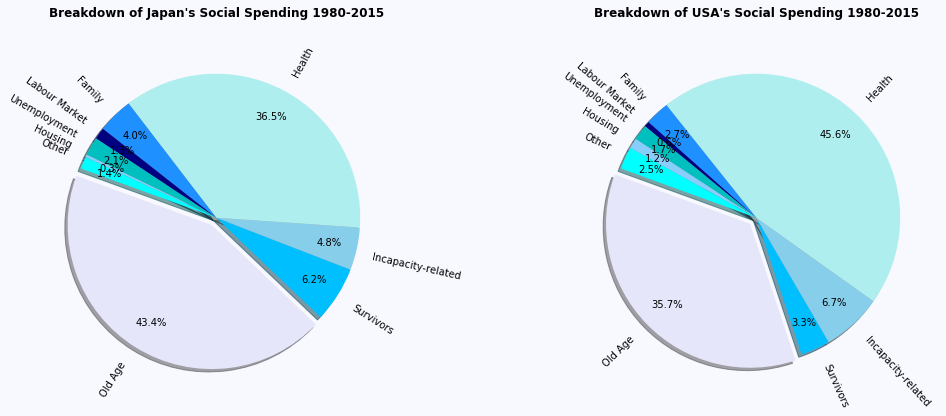

In [77]:
fig = plt.figure(figsize= (15,10))
fig.patch.set_facecolor('ghostwhite')
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
branches = 'Old Age', 'Survivors', 'Incapacity-related', 'Health', 'Family','Labour Market', 'Unemployment', 'Housing','Other'
size1 = jap_pie_list
piecolors = ["lavender","deepskyblue","skyblue","paleturquoise","dodgerblue","navy","c","lightskyblue","cyan"]
pieexplode = (0.06,0,0,0,0,0,0,0,0)
plt.pie(size1 ,explode = pieexplode ,labels = branches,colors = piecolors, autopct='%1.1f%%',pctdistance = .8 , shadow=True, startangle=1600,rotatelabels = True, textprops=dict(color="black") )
plt.title("Breakdown of Japan's Social Spending 1980-2015\n", fontsize = 12, fontweight = "bold",color = "Black")

ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
size2 = USA_mean_list
plt.pie(size2 ,explode = pieexplode ,labels = branches,colors = piecolors, autopct='%1.1f%%',pctdistance = .8 , shadow=True, startangle=1600,rotatelabels = True, textprops=dict(color="black") )
plt.title("Breakdown of USA's Social Spending 1980-2015\n", fontsize = 12, fontweight = "bold", color = "black")
#plt.savefig("BreakdownSocialSpending.png", bbox_inches = "tight", dpi = 1200)

plt.show()

From this pie chart, we can see that Social Spending on Old Age programs is the largest part of Japan's social spending at 43.4%. The United States also has high spending on Old Age but Health related social spending is higher. This could be a reason to why Japan's social spending has risen so much.

I now am going to isolate the Old Age related social spending to see how it has moved from 1980-2015.

In [78]:
def oldagebranch(df, country, branch):
    df1 = df[df["Country"]==country]
    df2 = df1[df1["Measure"] == "In percentage of Gross Domestic Product"]
    df3 = df2[df2["Type of Expenditure"] == "Total"]
    df4 = df3[df3["Type of Programme"]== "Total"]
    df5 = df4[df4["Branch"] == branch]
    
    df6 = df5[df5["Source"]== "Public"]
    df7 = df5[df5["Source"] == "Private (Mandatory and Voluntary)"]
    
    df8 = df6.copy()
    df8["Value"] = df6["Value"] + df7["Value"]    
    df8["Source"] = "Net_Total"
    df8 = df8.iloc[0:8]
    return df8

In [79]:
ja_df = oldagebranch(soc_exp, "Japan", "Old age")
ja_df

,SOURCE,Source,BRANCH,Branch,TYPEXP,Type of Expenditure,TYPROG,Type of Programme,UNIT,Measure,...,YEAR,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Year,,,,,,,,,,,,,,,,,,,,,
1980,10,Net_Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1980,PC,Percentage,0,Units,NaN,NaN,2.934,NaN,NaN
1985,10,Net_Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1985,PC,Percentage,0,Units,NaN,NaN,3.787,NaN,NaN
1990,10,Net_Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1990,PC,Percentage,0,Units,NaN,NaN,4.105,NaN,NaN
1995,10,Net_Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,1995,PC,Percentage,0,Units,NaN,NaN,5.313,NaN,NaN
2000,10,Net_Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2000,PC,Percentage,0,Units,NaN,NaN,9.783,NaN,NaN
2005,10,Net_Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2005,PC,Percentage,0,Units,NaN,NaN,10.547,NaN,NaN
2010,10,Net_Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2010,PC,Percentage,0,Units,NaN,NaN,12.929,NaN,NaN
2015,10,Net_Total,1,Old age,0,Total,0,Total,PCT_GDP,In percentage of Gross Domestic Product,...,2015,PC,Percentage,0,Units,NaN,NaN,12.622,NaN,NaN


In [80]:
ja_df["Value"]

Year
1980     2.934
1985     3.787
1990     4.105
1995     5.313
2000     9.783
2005    10.547
2010    12.929
2015    12.622
Name: Value, dtype: float64

In [81]:
us_df = oldagebranch(soc_exp, "United States", "Old age")

In [82]:
us_df["Value"]

Year
1980     6.327
1985     7.512
1990     7.566
1995     8.173
2000     8.532
2005     8.663
2010    10.320
2015    11.651
Name: Value, dtype: float64

In [83]:
jpnCAGR = ((ja_df.iloc[-1]["Value"]/ja_df.iloc[0]["Value"])**(1/35) - 1)*100
jpnCAGR

4.256898686837585

In [84]:
USCAGR = ((us_df.iloc[-1]["Value"]/us_df.iloc[0]["Value"])**(1/35) - 1)*100
USCAGR

1.7597785906666719

In [85]:
CAGRLIST = [USCAGR,jpnCAGR]
CAGRLIST

[1.7597785906666719, 4.256898686837585]

<a id='section4'></a>
### [Section 2: Old Age Social Spending as a % of GDP](#section8)

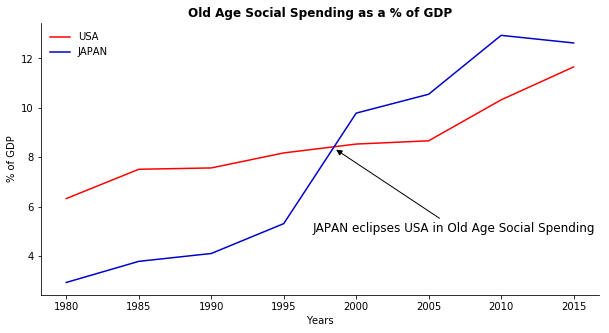

In [86]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(us_df.index, us_df["Value"], color = "red", label = "USA")
ax.plot(ja_df.index, ja_df["Value"], color = "mediumblue", label = "JAPAN")

ax.set_title("Old Age Social Spending as a % of GDP", fontsize = 12, fontweight = "bold")
ax.legend(frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xlabel('Years')
plt.ylabel('% of GDP')

ax.annotate(
    "JAPAN eclipses USA in Old Age Social Spending", 
    xy=(1998.5, 8.35), # This is where we point at...
    xycoords="data", # Not exactly sure about this
    xytext=(1997, 5), # This is about where the text is
    horizontalalignment="left", # How the text is alined
    arrowprops={
        "arrowstyle": "-|>", # This is stuff about the arrow
        
        "color": "black"
    },  
    fontsize=12,
)    

#plt.savefig("OldageSS.png", bbox_inches = "tight", dpi = 1200)
plt.show()

We can see that between 1995 and 2000, Japan surpassed the US in Old Age Social Spending. The Japanese Old age social spending has increased from below 4% to over 12% since 1980.

<a id='section5'></a>
### [Section 2: CAGR of Old Age Social Spending 1980-2015](#section8)

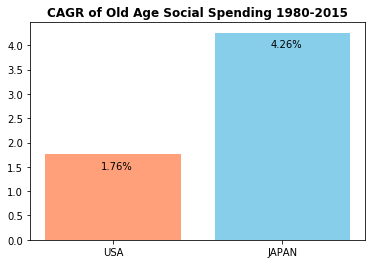

In [87]:
CAGRLABEL = ["USA","JAPAN"]
num = [1,2]
plt.bar(num,CAGRLIST, color = ["lightsalmon", "skyblue"])
plt.xticks(num, CAGRLABEL)
plt.title("CAGR of Old Age Social Spending 1980-2015", fontsize = 12, fontweight = "bold")
for i, v in enumerate(CAGRLIST):
    plt.text(num[i] - 0.07, v - 0.3, str(round(v, 2))+"%")
#plt.savefig("CAGROldageSS.png", bbox_inches = "tight", dpi = 1200)
plt.show()


The CAGR in Old Age Social Spending was far larger for Japan than the US between 1980 and 2015. This may be a sign that population age increase has caused a large rise in social spending for Japan.

I want to now see how the average medium population at these times have a correlation to the increase in Old Age Social Spending.`

<a id='section10'></a>
## Section 3: Japan and United States Medium Age Trends and Medium Age and Old Age Correlative Analysis

Here I am importing the medium population age dataframe from the [United Nations Population Prospects](https://population.un.org/wpp/Download/Standard/Population/)

In [88]:
url3 = "https://population.un.org/wpp/DVD/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2017_POP_F05_MEDIAN_AGE.xlsx"

In [89]:
mediumage = pd.read_excel(url3)
mediumage

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,World Population Prospects: The 2017 Revision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"File POP/5: Median age by region, subregion an...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Estimates, 1950 - 2015",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,POP/DB/WPP/Rev.2017/POP/F05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
medium = mediumage.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
medium

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
14,Index,Variant,"Region, subregion, country or area *",Notes,Country code,1950,1955.000000,1960.000000,1965.000000,1970.000000,1975.000000,1980.000000,1985.000000,1990.000000,1995.000000,2000.000000,2005.000000,2010.000000,2015.000000
15,1,Estimates,WORLD,NaN,900,23.5898,23.143139,22.689060,21.988245,21.536510,21.892168,22.593730,23.297514,24.038792,25.109477,26.331510,27.436396,28.514241,29.624951
16,2,Estimates,More developed regions,a,901,28.4823,28.975673,29.536944,29.880577,30.580756,30.927260,31.901684,33.071608,34.362771,35.769394,37.288398,38.684619,39.919971,41.085165
17,3,Estimates,Less developed regions,b,902,21.452,20.696901,20.035858,19.178598,18.861388,19.294787,19.945954,20.841203,21.745696,22.888471,24.095613,25.186949,26.456720,27.771954
18,4,Estimates,Least developed countries,c,941,19.3646,19.080937,18.686253,18.234924,17.853850,17.668699,17.498154,17.413975,17.527045,17.851890,18.185719,18.617416,19.026898,19.615192
19,5,Estimates,"Less developed regions, excluding least develo...",d,934,21.7336,20.921754,20.240822,19.307118,18.985300,19.502020,20.305328,21.330445,22.337052,23.648462,25.105240,26.466072,27.869170,29.298596
20,6,Estimates,"Less developed regions, excluding China",NaN,948,20.3722,19.999496,19.527386,18.907328,18.632330,18.842178,19.216778,19.640989,20.198822,20.993359,21.936169,22.969416,24.085877,25.196131
21,7,Estimates,High-income countries,e,1503,28.7951,29.132841,29.246310,29.199704,29.335147,29.703563,30.854934,32.081288,33.402543,34.796415,36.339906,37.785633,39.095645,40.419832
22,8,Estimates,Middle-income countries,e,1517,22.1721,21.547747,21.036785,20.012721,19.619482,20.141663,20.879653,21.726976,22.587107,23.787542,25.145882,26.421199,27.751224,29.122137
23,9,Estimates,Upper-middle-income countries,e,1502,23.0535,22.204868,21.695474,20.511734,20.011616,20.907462,22.093372,23.307921,24.454053,26.339331,28.472298,30.583404,32.339443,33.888730


In [91]:
medium.columns = medium.iloc[0]
medium

14,Index,Variant,"Region, subregion, country or area *",Notes,Country code,1950,1955.0,1960.0,1965.0,1970.0,1975.0,1980.0,1985.0,1990.0,1995.0,2000.0,2005.0,2010.0,2015.0
14,Index,Variant,"Region, subregion, country or area *",Notes,Country code,1950,1955.000000,1960.000000,1965.000000,1970.000000,1975.000000,1980.000000,1985.000000,1990.000000,1995.000000,2000.000000,2005.000000,2010.000000,2015.000000
15,1,Estimates,WORLD,NaN,900,23.5898,23.143139,22.689060,21.988245,21.536510,21.892168,22.593730,23.297514,24.038792,25.109477,26.331510,27.436396,28.514241,29.624951
16,2,Estimates,More developed regions,a,901,28.4823,28.975673,29.536944,29.880577,30.580756,30.927260,31.901684,33.071608,34.362771,35.769394,37.288398,38.684619,39.919971,41.085165
17,3,Estimates,Less developed regions,b,902,21.452,20.696901,20.035858,19.178598,18.861388,19.294787,19.945954,20.841203,21.745696,22.888471,24.095613,25.186949,26.456720,27.771954
18,4,Estimates,Least developed countries,c,941,19.3646,19.080937,18.686253,18.234924,17.853850,17.668699,17.498154,17.413975,17.527045,17.851890,18.185719,18.617416,19.026898,19.615192
19,5,Estimates,"Less developed regions, excluding least develo...",d,934,21.7336,20.921754,20.240822,19.307118,18.985300,19.502020,20.305328,21.330445,22.337052,23.648462,25.105240,26.466072,27.869170,29.298596
20,6,Estimates,"Less developed regions, excluding China",NaN,948,20.3722,19.999496,19.527386,18.907328,18.632330,18.842178,19.216778,19.640989,20.198822,20.993359,21.936169,22.969416,24.085877,25.196131
21,7,Estimates,High-income countries,e,1503,28.7951,29.132841,29.246310,29.199704,29.335147,29.703563,30.854934,32.081288,33.402543,34.796415,36.339906,37.785633,39.095645,40.419832
22,8,Estimates,Middle-income countries,e,1517,22.1721,21.547747,21.036785,20.012721,19.619482,20.141663,20.879653,21.726976,22.587107,23.787542,25.145882,26.421199,27.751224,29.122137
23,9,Estimates,Upper-middle-income countries,e,1502,23.0535,22.204868,21.695474,20.511734,20.011616,20.907462,22.093372,23.307921,24.454053,26.339331,28.472298,30.583404,32.339443,33.888730


In [92]:
medium.set_index("Index",inplace = True)

In [93]:
japmedage = medium[medium["Region, subregion, country or area *"]=="Japan"]
japmedage

14,Variant,"Region, subregion, country or area *",Notes,Country code,1950,1955.0,1960.0,1965.0,1970.0,1975.0,1980.0,1985.0,1990.0,1995.0,2000.0,2005.0,2010.0,2015.0
Index,,,,,,,,,,,,,,,,,,
83,Estimates,Japan,NaN,392,22.349,23.582,25.389,27.175,28.776,30.264,32.55,35.004,37.282,39.397,41.205,43.004,44.655,46.348


In [94]:
japtrans = japmedage.T
japtrans

Index,83
14,
Variant,Estimates
"Region, subregion, country or area *",Japan
Notes,NaN
Country code,392
1950,22.349
1955.0,23.582
1960.0,25.389
1965.0,27.175
1970.0,28.776


In [95]:
japtrans.reset_index(inplace = True)

In [96]:
japtrans.columns = japtrans.iloc[1]

In [97]:
japtrans

1,"Region, subregion, country or area *",Japan
0,Variant,Estimates
1,"Region, subregion, country or area *",Japan
2,Notes,NaN
3,Country code,392
4,1950,22.349
5,1955,23.582
6,1960,25.389
7,1965,27.175
8,1970,28.776
9,1975,30.264


In [98]:
japr = japtrans.drop([0,1,2,3,4,5,6,7,8,9])

In [99]:
japr

1,"Region, subregion, country or area *",Japan
10,1980,32.55
11,1985,35.004
12,1990,37.282
13,1995,39.397
14,2000,41.205
15,2005,43.004
16,2010,44.655
17,2015,46.348


In [100]:
japr.columns = ["Years","Mediumage"]

In [101]:
japr.set_index("Years",inplace = True)

In [102]:
japr["Country"] = "Japan"

In [103]:
japr.index = japr.index.map(int)

In [104]:
japr["Mediumage"]

Years
1980     32.55
1985    35.004
1990    37.282
1995    39.397
2000    41.205
2005    43.004
2010    44.655
2015    46.348
Name: Mediumage, dtype: object

In [105]:
def cleanpop(df,Country):
    df = df.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
    df.columns = df.iloc[0]
    df.set_index("Index", inplace = True)
    df1 = df[df["Region, subregion, country or area *"]==Country]
    df2 = df1.T    
    df2.reset_index(inplace = True)
    df2.columns = df2.iloc[1]
    df3 = df2.drop([0,1,2,3,4,5,6,7,8,9])
    df3.columns = ["Years","Mediumage"]
    df3.set_index("Years", inplace = True)
    df3.index = df3.index.map(int)
    df3["Country"] = Country
    df3["Mediumage"] = df3.Mediumage.astype(float)
    
    return df3

In [106]:
USMED = cleanpop(mediumage, "United States of America")
USMED

,Mediumage,Country
Years,,
1980,29.997,United States of America
1985,31.427,United States of America
1990,32.826,United States of America
1995,34.027,United States of America
2000,35.186,United States of America
2005,36.113,United States of America
2010,36.907,United States of America
2015,37.621,United States of America


In [107]:
#pretty cool equation to find any medium age from just the name!
JPMED = cleanpop(mediumage, "Japan")
JPMED

,Mediumage,Country
Years,,
1980,32.550,Japan
1985,35.004,Japan
1990,37.282,Japan
1995,39.397,Japan
2000,41.205,Japan
2005,43.004,Japan
2010,44.655,Japan
2015,46.348,Japan


In [108]:
JPMED["Mediumage"] = JPMED.Mediumage.astype(float)
JPMED["Mediumage"].dtypes

dtype('float64')

In [109]:
JP_MA_ARRAY = np.array(JPMED["Mediumage"])
JP_MA_ARRAY

array([32.55 , 35.004, 37.282, 39.397, 41.205, 43.004, 44.655, 46.348])

In [110]:
US_MA_ARRAY = np.array(USMED["Mediumage"])
US_MA_ARRAY

array([29.997, 31.427, 32.826, 34.027, 35.186, 36.113, 36.907, 37.621])

<a id='section6'></a>
### [Section 3: Medium Age from 1980 to 2015](#section8)

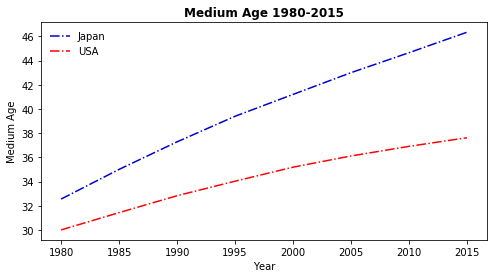

In [111]:
ax1 = plt.figure(figsize = (8,4))
ax1 = fig.add_axes([0, 0, .6, .5], aspect= 1)
plt.plot(JPMED.index ,JP_MA_ARRAY, color = "mediumblue", label = "Japan", linestyle = "-.")
plt.plot(USMED.index, US_MA_ARRAY, color = "red", label = "USA", linestyle = "-.")
plt.legend(frameon=False)
plt.title("Medium Age 1980-2015", fontsize = 12, fontweight = "bold")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.xlabel('Year')
plt.ylabel('Medium Age')
#plt.savefig("medage.png", bbox_inches = "tight", dpi = 1200)
plt.show()

This shows that Japan's medium age has steadily increased since 1980 at a pace afaster than the US. Japan has had a sharp increase in Medium age, beginning over 32 years old in 1980 and now over 46 years old in 2015. The US has also increased from around 30 years old to over 36 in 2015.

I now want to see how the increase in medium age correlates to social spending for the countries.

In [112]:
def anybranch(df, country, branch):
    df1 = df[df["Country"]==country]
    df2 = df1[df1["Measure"] == "In percentage of Gross Domestic Product"]
    df3 = df2[df2["Type of Expenditure"] == "Total"]
    df4 = df3[df3["Type of Programme"]== "Total"]
    df5 = df4[df4["Branch"] == branch]
    
    df6 = df5[df5["Source"]== "Public"]
    df7 = df5[df5["Source"] == "Private (Mandatory and Voluntary)"]
    
    df8 = df6.copy()
    df8["Value"] = df6["Value"] + df7["Value"]    
    df8["Source"] = "Net_Total"
    df8 = df8.iloc[0:8]
    df9 = df8.drop(columns=["COUNTRY","SOURCE","BRANCH","TYPEXP","Type of Expenditure", "TYPROG","Type of Programme","Measure","Unit","PowerCode Code", "PowerCode","Reference Period Code","Reference Period","Flag Codes", "Flags","YEAR","Unit Code"])
    return df9

In [113]:
JPSS = anybranch(soc_exp, "Japan", "Old age")
JPSS

,Source,Branch,UNIT,Country,Value
Year,,,,,
1980,Net_Total,Old age,PCT_GDP,Japan,2.934
1985,Net_Total,Old age,PCT_GDP,Japan,3.787
1990,Net_Total,Old age,PCT_GDP,Japan,4.105
1995,Net_Total,Old age,PCT_GDP,Japan,5.313
2000,Net_Total,Old age,PCT_GDP,Japan,9.783
2005,Net_Total,Old age,PCT_GDP,Japan,10.547
2010,Net_Total,Old age,PCT_GDP,Japan,12.929
2015,Net_Total,Old age,PCT_GDP,Japan,12.622


In [114]:
USSS = anybranch(soc_exp, "United States", "Old age")
USSS

,Source,Branch,UNIT,Country,Value
Year,,,,,
1980,Net_Total,Old age,PCT_GDP,United States,6.327
1985,Net_Total,Old age,PCT_GDP,United States,7.512
1990,Net_Total,Old age,PCT_GDP,United States,7.566
1995,Net_Total,Old age,PCT_GDP,United States,8.173
2000,Net_Total,Old age,PCT_GDP,United States,8.532
2005,Net_Total,Old age,PCT_GDP,United States,8.663
2010,Net_Total,Old age,PCT_GDP,United States,10.320
2015,Net_Total,Old age,PCT_GDP,United States,11.651


In [115]:
us_va_array = np.array(USSS["Value"])
us_va_array

array([ 6.327,  7.512,  7.566,  8.173,  8.532,  8.663, 10.32 , 11.651])

I make Arrays here so I can run the Numpy correlation coefficient equation

In [116]:
jp_va_array = np.array(JPSS["Value"])
jp_va_array

array([ 2.934,  3.787,  4.105,  5.313,  9.783, 10.547, 12.929, 12.622])

In [117]:
np.corrcoef(JP_MA_ARRAY,jp_va_array)

array([[1.        , 0.95505619],
       [0.95505619, 1.        ]])

In [118]:
np.corrcoef(US_MA_ARRAY,us_va_array)

array([[1.        , 0.91846898],
       [0.91846898, 1.        ]])

Now, I need an equation to plot a linear regression of these two data points.
I use this [source](https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python) to help me

In [119]:
def linearreg(dataX, dataY):
    #ybar = m(xbar) + b
    xbar = sum(dataX)/len(dataX)
    ybar = sum(dataY)/len(dataY)
    n = len(dataX)
    top = 0
    top = sum([xi*yi for xi,yi in zip(dataX,dataY)]) - n*xbar*ybar
    bot = sum([xi**2 for xi in dataX]) - n * xbar**2
    m = top/bot
    b = ybar - m * xbar
    return m, b

In [120]:
j_m,j_b = linearreg(JP_MA_ARRAY,jp_va_array)

In [121]:
u_m, u_b = linearreg(US_MA_ARRAY,us_va_array)

In [122]:
j_yfit = [j_b + j_m*xi for xi in JP_MA_ARRAY] 
j_yfit

[1.643508063786964,
 3.674700030790678,
 5.560215638302683,
 7.310815071967259,
 8.807308583109357,
 10.296352734959267,
 11.662896311782067,
 13.064203565301742]

In [123]:
u_yfit = [u_b +u_m*xi for xi in US_MA_ARRAY]
u_yfit

[6.14458022197465,
 6.965311652489476,
 7.768251003042096,
 8.45755061706189,
 9.122744832423205,
 9.6547854170996,
 10.11049223935748,
 10.5202840165516]

<a id='section7'></a>
### [Section 3: Linear Regression of Medium Age and Old Age Social Spending](#section8)

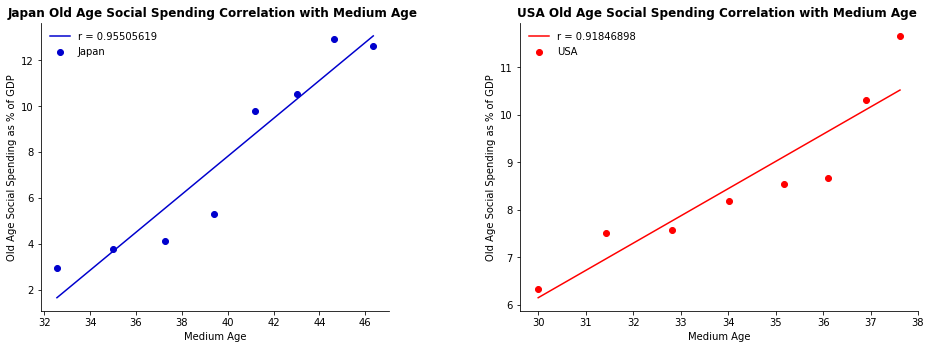

In [124]:
fig= plt.figure(figsize = (10,8))


ax1 = fig.add_axes([0, 0, .6, .5], aspect=1)
plt.scatter(JP_MA_ARRAY, jp_va_array, color = "mediumblue", label = "Japan")
plt.plot(JP_MA_ARRAY,j_yfit, color = "mediumblue",label = "r = 0.95505619")
plt.title("Japan Old Age Social Spending Correlation with Medium Age ", fontsize = 12, fontweight = "bold")
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
plt.xlabel('Medium Age')
plt.ylabel('Old Age Social Spending as % of GDP')
plt.legend(frameon=False)

ax2 = fig.add_axes([.7,.0,.6,.5], aspect = 1)
plt.scatter(US_MA_ARRAY, us_va_array, color = "red", label = "USA")
plt.plot(US_MA_ARRAY,u_yfit, color = "r", label  = "r = 0.91846898")
plt.title("USA Old Age Social Spending Correlation with Medium Age ", fontsize = 12, fontweight = "bold")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
plt.xlabel('Medium Age')
plt.ylabel('Old Age Social Spending as % of GDP')
plt.legend(frameon=False)
#plt.savefig("OldageregressionSS.png", bbox_inches = "tight", dpi = 1200)
plt.show()




The correlation for increasing Medium Age with Old Age Social spending in Japan is incredibly high at a correlation coefficient of r = 0.955. From this basic information, we can begin making a hypothesis about increasing medium age as a factor of social spending. The US similarly has a large correlation coefficient at r = 0.918. Although we do not have enough data to make a solid claim about medium age as a coefficient for increased Old Age Social Spending, we can at least hypothesize that it is a large factor. 

<a id='section9'></a>
### [Conclusion:](#section8)
In this project, I analyzed the general social spending behavior of OECD countries to narrow down large factors within social spending. I learned that Old Age related social spending is the largest social spending component for Japan and the second largest for the US. From this, I hypothesized that Japan's Old Age Social Spending may be higher because of a higher medium age. I tested this in a linear regression and it turns out the Japan's old age social spending has a higher correlation with a higher medium age than does the US's. This report functions as an initial insight into a larger issue stemming from the projected growth of social spending. In the future, social spending in the US is expected to run the US into a deep Fiscal Deficit. This report hopefully provided an initial insight into how the US could potentially learn from Japan's population issue, which is expected to become an issue for the US. 